# Farplas E117 OK/NOK Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

In [2]:
df = pd.read_csv("30_inj_cyc_e117_deneme.csv")

In [3]:
df.head()

,Unnamed: 0,date,reason,timCool1,strCushion1,tmpMoldZone3,tmpFlange1,tmpMoldZone4,strPlasticisation1,tmpMoldZone1,...,tmpMoldZone12,decMold,prsHoldSpec1,tmpNozle1,timestamp,prsInjectionHyd1,timCycle,sfc,frcClamp,timPlasticisation1
0,18793,2020-12-28T03:21:21.000,[],23.00,18.2,301.0,93.0,300.0,111.2,301.0,...,0.0,2297,822.0,260.0,2020-12-28 06:21:21.0,64.41,57.52,[],4100.0,13.78
1,15100,2020-12-24T11:42:24.000,[],20.01,17.9,300.0,94.0,299.0,111.3,300.0,...,0.0,2297,837.0,260.0,2020-12-24 14:42:24.0,65.60,54.45,[],4000.0,13.65
2,15099,2020-12-24T11:41:31.000,[],20.01,18.1,300.0,94.0,299.0,111.3,300.0,...,0.0,2297,841.0,260.0,2020-12-24 14:41:31.0,65.89,54.44,[],4000.0,13.64
3,15098,2020-12-24T11:50:33.000,[],20.00,17.3,300.0,93.0,300.0,111.3,300.0,...,0.0,2297,812.0,260.0,2020-12-24 14:50:33.0,63.65,54.45,[],4000.0,13.79
4,15097,2020-12-24T11:49:41.000,[],20.01,17.6,300.0,93.0,300.0,111.2,300.0,...,0.0,2297,822.0,260.0,2020-12-24 14:49:41.0,64.45,54.45,[],4000.0,13.84


In [4]:
df.columns

Index(['Unnamed: 0', 'date', 'reason', 'timCool1', 'strCushion1',
       'tmpMoldZone3', 'tmpFlange1', 'tmpMoldZone4', 'strPlasticisation1',
       'tmpMoldZone1', 'tmpMoldZone2', 'spdInjection1', 'tmpMoldZone9',
       'tmpMoldZone7', 'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5',
       'tmpMoldZone6', 'tmpMoldZone19', 'cntCycle', 'tmpMoldZone18',
       'stsMachine', 'tmpMoldZone15', 'volTransfer1', 'tmpMoldZone14',
       'tmpMoldZone17', 'strTransfer1', 'tmpMoldZone16', 'timTransfer1',
       'timMoldClose', 'tmpBarrel1Zone5', 'tmpBarrel1Zone4', 'prsPomp1',
       'tmpBarrel1Zone1', 'tmpBarrel1Zone3', 'tmpMoldZone20',
       'tmpBarrel1Zone2', 'volShot1', 'timFill1', 'timMoldOpen',
       'tmpMoldZone11', 'tmpMoldZone10', 'prsTransferHyd1', 'tmpMoldZone13',
       'tmpMoldZone12', 'decMold', 'prsHoldSpec1', 'tmpNozle1', 'timestamp',
       'prsInjectionHyd1', 'timCycle', 'sfc', 'frcClamp',
       'timPlasticisation1'],
      dtype='object')

In [5]:
df.reason.unique()

array(['[]', '[14, 14]', '[14]', '[531]', '[7, 7]', '[74, 74]',
       '[532, 532]', '[531, 531]', '[74]', '[74, 74, 74]', '[53, 14]',
       '[2]', '[2, 2, 2, 2]', '[2, 2]', '[76, 76]',
       '[76, 76, 76, 76, 76, 76]', '[74, 14]', '[531, 532]', '[532, 531]',
       '[532]', '[53, 53]', '[53]', '[531, 531, 531]', '[36, 36]', '[36]',
       '[36, 36, 36]', '[36, 36, 36, 36, 36]'], dtype=object)

In [6]:
df['reason'] = df['reason'].replace(['[]'],0)

In [7]:
df.reason.unique()

array([0, '[14, 14]', '[14]', '[531]', '[7, 7]', '[74, 74]', '[532, 532]',
       '[531, 531]', '[74]', '[74, 74, 74]', '[53, 14]', '[2]',
       '[2, 2, 2, 2]', '[2, 2]', '[76, 76]', '[76, 76, 76, 76, 76, 76]',
       '[74, 14]', '[531, 532]', '[532, 531]', '[532]', '[53, 53]',
       '[53]', '[531, 531, 531]', '[36, 36]', '[36]', '[36, 36, 36]',
       '[36, 36, 36, 36, 36]'], dtype=object)

In [8]:
df['reason'][df['reason'] != 0] = 1

In [9]:
df.reason.unique()

array([0, 1], dtype=object)

In [10]:
df.reason.describe()

count     29454
unique        2
top           0
freq      29150
Name: reason, dtype: int64

In [11]:
df['reason'].value_counts()

0    29150
1      304
Name: reason, dtype: int64

In [12]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold']

In [13]:
df2 = df.drop(drop_list, axis=1)

In [14]:
df2.head()

,reason,timCool1,strCushion1,tmpMoldZone3,tmpFlange1,tmpMoldZone4,strPlasticisation1,tmpMoldZone1,tmpMoldZone2,spdInjection1,...,tmpMoldZone10,prsTransferHyd1,tmpMoldZone13,tmpMoldZone12,prsHoldSpec1,tmpNozle1,prsInjectionHyd1,timCycle,frcClamp,timPlasticisation1
0,0,23.00,18.2,301.0,93.0,300.0,111.2,301.0,300.0,26.0,...,0.0,64.07,0.0,0.0,822.0,260.0,64.41,57.52,4100.0,13.78
1,0,20.01,17.9,300.0,94.0,299.0,111.3,300.0,300.0,26.6,...,0.0,65.30,0.0,0.0,837.0,260.0,65.60,54.45,4000.0,13.65
2,0,20.01,18.1,300.0,94.0,299.0,111.3,300.0,300.0,26.0,...,0.0,65.60,0.0,0.0,841.0,260.0,65.89,54.44,4000.0,13.64
3,0,20.00,17.3,300.0,93.0,300.0,111.3,300.0,300.0,26.0,...,0.0,63.31,0.0,0.0,812.0,260.0,63.65,54.45,4000.0,13.79
4,0,20.01,17.6,300.0,93.0,300.0,111.2,300.0,300.0,26.0,...,0.0,64.24,0.0,0.0,822.0,260.0,64.45,54.45,4000.0,13.84


<AxesSubplot:xlabel='reason', ylabel='count'>

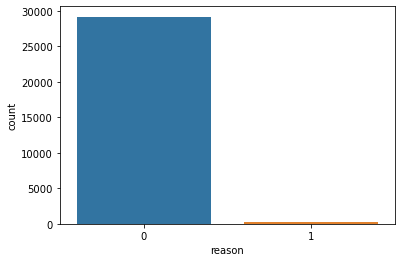

In [15]:
sns.countplot(x='reason',data=df2)

Injection data is imbalanced defect ratio is %1

<AxesSubplot:>

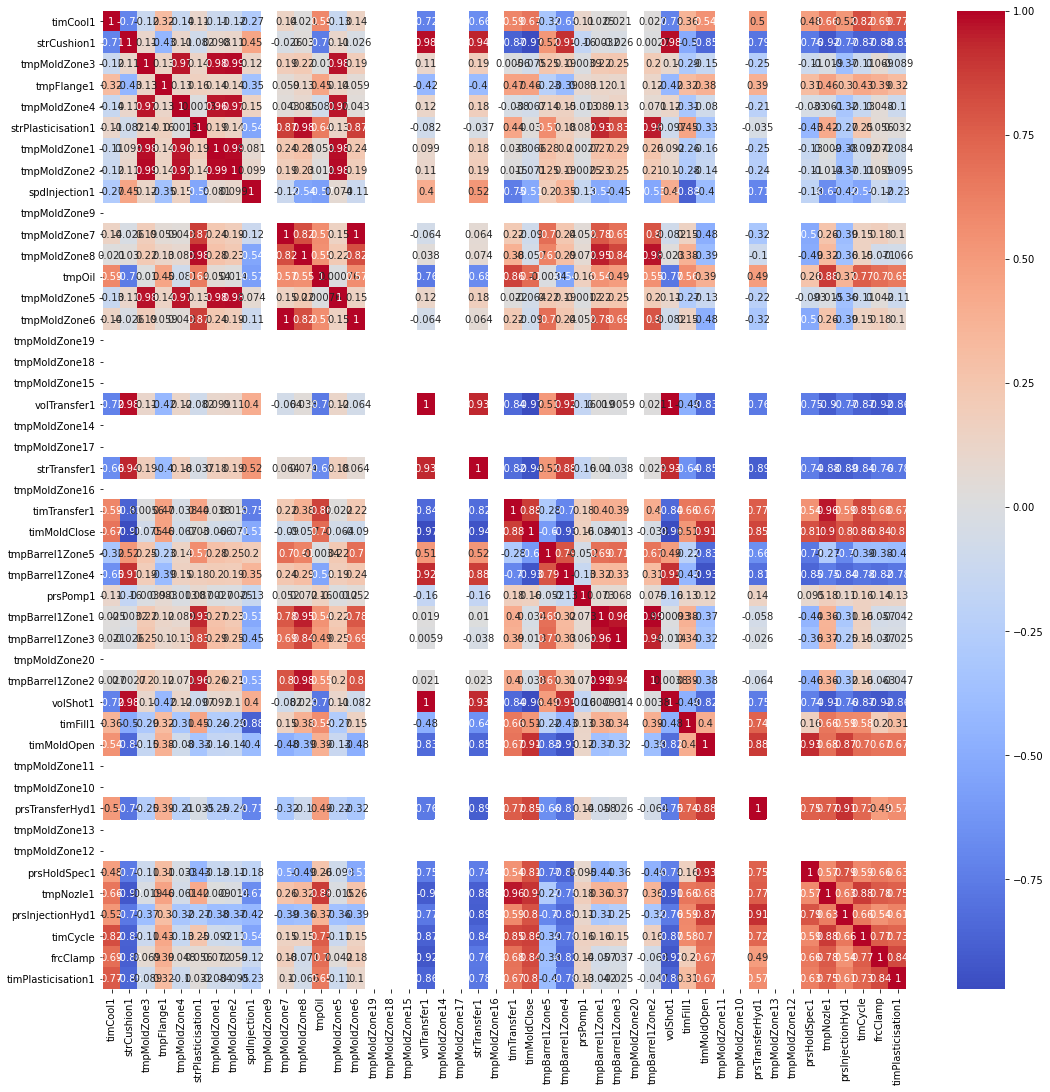

In [16]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

In [17]:
drop_list2 = ['tmpMoldZone12', 'tmpMoldZone13', 'tmpMoldZone10', 'tmpMoldZone11', 'tmpMoldZone20', 'tmpMoldZone16', 'tmpMoldZone17','tmpMoldZone14','tmpMoldZone15','tmpMoldZone18','tmpMoldZone19','tmpMoldZone9']

In [18]:
df2.drop(drop_list2, axis=1, inplace=True)

In [19]:
df2.columns

Index(['reason', 'timCool1', 'strCushion1', 'tmpMoldZone3', 'tmpFlange1',
       'tmpMoldZone4', 'strPlasticisation1', 'tmpMoldZone1', 'tmpMoldZone2',
       'spdInjection1', 'tmpMoldZone7', 'tmpMoldZone8', 'tmpOil',
       'tmpMoldZone5', 'tmpMoldZone6', 'volTransfer1', 'strTransfer1',
       'timTransfer1', 'timMoldClose', 'tmpBarrel1Zone5', 'tmpBarrel1Zone4',
       'prsPomp1', 'tmpBarrel1Zone1', 'tmpBarrel1Zone3', 'tmpBarrel1Zone2',
       'volShot1', 'timFill1', 'timMoldOpen', 'prsTransferHyd1',
       'prsHoldSpec1', 'tmpNozle1', 'prsInjectionHyd1', 'timCycle', 'frcClamp',
       'timPlasticisation1'],
      dtype='object')

In [20]:
df2.describe()

,timCool1,strCushion1,tmpMoldZone3,tmpFlange1,tmpMoldZone4,strPlasticisation1,tmpMoldZone1,tmpMoldZone2,spdInjection1,tmpMoldZone7,...,volShot1,timFill1,timMoldOpen,prsTransferHyd1,prsHoldSpec1,tmpNozle1,prsInjectionHyd1,timCycle,frcClamp,timPlasticisation1
count,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,...,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000
mean,19.732267,24.498211,293.849528,90.816290,294.110172,107.571657,293.757792,293.826984,29.717824,275.190840,...,111.966195,4.472354,2.033904,54.906003,741.912542,255.173219,60.300965,50.005905,3805.110342,10.714572
std,4.681738,6.758521,5.888146,2.978134,5.906098,8.846235,5.960497,5.922531,7.293233,72.012899,...,128.573107,0.817827,0.596941,16.211853,116.603704,5.062292,11.284600,8.768022,374.734136,4.335723
min,15.000000,0.400000,258.000000,71.000000,259.000000,35.300000,259.000000,259.000000,8.300000,0.000000,...,0.000000,0.530000,1.300000,9.600000,71.000000,234.000000,9.730000,29.500000,3300.000000,1.580000
25%,16.000000,18.600000,291.000000,89.000000,294.000000,109.200000,288.000000,291.000000,26.000000,285.000000,...,0.000000,4.010000,1.310000,37.770000,603.000000,250.000000,47.320000,41.170000,3400.000000,6.280000
50%,20.010000,19.500000,295.000000,91.000000,295.000000,110.900000,295.000000,295.000000,26.600000,295.000000,...,0.000000,4.670000,2.420000,62.340000,784.000000,259.000000,63.020000,54.450000,3800.000000,13.180000
75%,23.020000,32.600000,300.000000,93.000000,299.000000,111.200000,300.000000,300.000000,33.200000,300.000000,...,267.000000,4.690000,2.430000,65.050000,821.000000,260.000000,65.930000,57.600000,4200.000000,13.930000
max,301.340000,88.000000,330.000000,98.000000,334.000000,116.000000,330.000000,330.000000,80.200000,329.000000,...,272.600000,11.990000,3.460000,95.660000,1285.000000,263.000000,100.740000,463.540000,4700.000000,300.000000


In [21]:
df2.dtypes

reason                 object
timCool1              float64
strCushion1           float64
tmpMoldZone3          float64
tmpFlange1            float64
tmpMoldZone4          float64
strPlasticisation1    float64
tmpMoldZone1          float64
tmpMoldZone2          float64
spdInjection1         float64
tmpMoldZone7          float64
tmpMoldZone8          float64
tmpOil                float64
tmpMoldZone5          float64
tmpMoldZone6          float64
volTransfer1          float64
strTransfer1          float64
timTransfer1          float64
timMoldClose          float64
tmpBarrel1Zone5       float64
tmpBarrel1Zone4       float64
prsPomp1              float64
tmpBarrel1Zone1       float64
tmpBarrel1Zone3       float64
tmpBarrel1Zone2       float64
volShot1              float64
timFill1              float64
timMoldOpen           float64
prsTransferHyd1       float64
prsHoldSpec1          float64
tmpNozle1             float64
prsInjectionHyd1      float64
timCycle              float64
frcClamp  

In [22]:
df2 = df2.astype({"reason": int})

<AxesSubplot:>

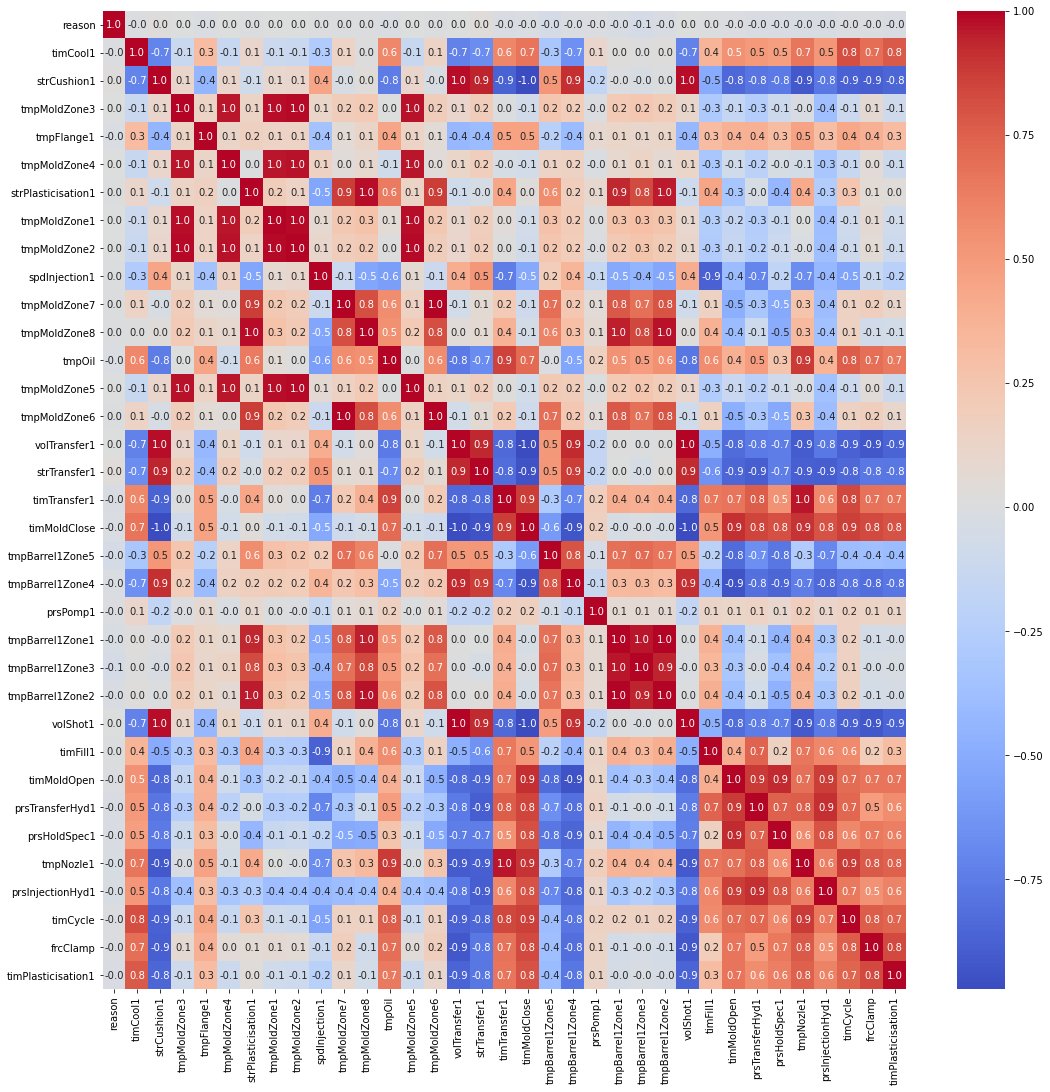

In [23]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm',fmt='.1f')

In [24]:
y = df2['reason']
X = df2.drop(['reason'], axis=1)

In [25]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.697986,-0.931908,1.214405,0.733260,0.997262,0.410164,1.215055,1.042311,-0.509772,0.344516,...,-0.870852,0.278360,0.646802,0.565275,0.686846,0.953493,0.364134,0.857003,0.786944,0.707029
1,0.059324,-0.976297,1.044569,1.069047,0.827943,0.421468,1.047281,1.042311,-0.427503,0.344516,...,-0.870852,0.290588,0.663554,0.641147,0.815489,0.953493,0.469589,0.506861,0.520083,0.677045
2,0.059324,-0.946704,1.044569,1.069047,0.827943,0.421468,1.047281,1.042311,-0.509772,0.344516,...,-0.870852,0.290588,0.663554,0.659652,0.849794,0.953493,0.495288,0.505721,0.520083,0.674738
3,0.057188,-1.065075,1.044569,0.733260,0.997262,0.421468,1.047281,1.042311,-0.509772,0.344516,...,-0.870852,0.278360,0.663554,0.518395,0.601084,0.953493,0.296784,0.506861,0.520083,0.709335
4,0.059324,-1.020686,1.044569,0.733260,0.997262,0.410164,1.047281,1.042311,-0.509772,0.344516,...,-0.870852,0.278360,0.663554,0.575761,0.686846,0.953493,0.367679,0.506861,0.520083,0.720867


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [27]:
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_resample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(46632, 34) (46632,)
23316 23316


In [43]:
y_val.value_counts()

0    5834
1      57
Name: reason, dtype: int64

Confusion Matrix:
 [[3780 2054]
 [  24   33]]
Accuracy:
 0.6472585299609573
Precision:
 0.01581217057977959
Recall:
 0.5789473684210527
AUC:
 0.7104481292363578


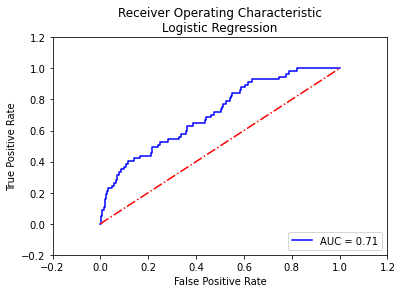

In [28]:
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
threshold = 0.6

In [81]:
y_logreg_prob = logreg.predict_proba(X_val)[:,1]

In [82]:
prob_thresh = (y_logreg_prob>=threshold).astype('int')

In [83]:
CM_2_Thresh = confusion_matrix(y_val,prob_thresh)
CM_2_Thresh

array([[5270,  564],
       [  37,   20]], dtype=int64)

In [84]:
print("Accuracy:\n",metrics.accuracy_score(y_val,prob_thresh))
print("Precision:\n",metrics.precision_score(y_val,prob_thresh))
print("Recall:\n",metrics.recall_score(y_val,prob_thresh))
print("AUC:\n",metrics.roc_auc_score(y_val,prob_thresh))

Accuracy:
 0.897979969444916
Precision:
 0.03424657534246575
Recall:
 0.3508771929824561
AUC:
 0.6271012636149854


In [85]:
F1 = 2*(metrics.recall_score(y_val,prob_thresh))*(metrics.precision_score(y_val,prob_thresh))/((metrics.recall_score(y_val,prob_thresh))+(metrics.precision_score(y_val,prob_thresh)))
F1

0.06240249609984399

Confusion Matrix:
 [[5824   10]
 [  51    6]]
Accuracy:
 0.9896452215243592
Precision:
 0.375
Recall:
 0.10526315789473684
AUC:
 0.7362466845894304


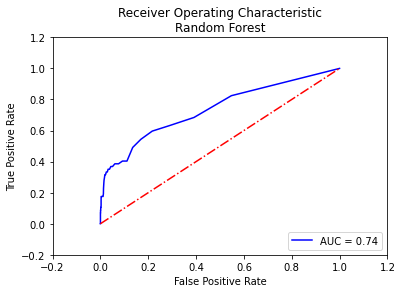

In [35]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_sm,y_sm)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix:
 [[5827    7]
 [  52    5]]
Accuracy:
 0.9899847224579867
Precision:
 0.4166666666666667
Recall:
 0.08771929824561403
AUC:
 0.7380705362996108


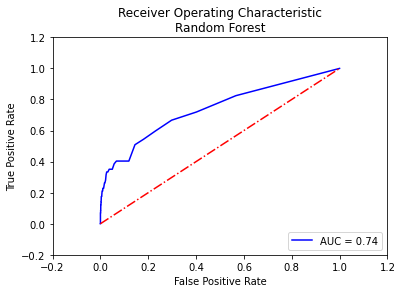

In [91]:
#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()